In [1]:
import pandas as pd
import numpy as np
import pyarrow
import os
import math
import re
from collections import Counter
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
path1 = r'E:\netData\APS\3 Paper\aps-papers-2010-CD5.zip'
path2 = r'E:\netData\APS\3 Paper\aps-papers-2010-SB.zip'
path3 = r'E:\netData\APS\3 Paper\nodepro2010.zip'

In [12]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [13]:
f2['CD5'] = f1['CD5']
f2['indegree'] = f3['indegree']
f2['cit5'] = f3['cit5']
f2['outdegree'] = f3['outdegree']
f2['year'] = f3['year']
f2['team size'] = f3['team size']
f2['first_cit_y'] = f3['first_cit_y']
f2['journal'] = f3['journal']
# df = f2[f2['indegree']>10]
# df = df[df['outdegree']>0]
df = f2
df.index = range(len(df))
del df['id']

In [15]:
df['journal'] = df['journal'].map(dict(zip(df['journal'].unique() , [0,1,2,3,4,5,6,7,0,0,8])))

In [20]:
df

,B,da,CD5,indegree,cit5,outdegree,year,team size,first_cit_y,journal,teamsize
0,0.000,0,1.000000,1,1.0,0,1913,1,0,0,1
1,29.914,9,1.000000,5,0.0,0,1913,1,10,0,1
2,0.000,0,0.000000,0,0.0,0,1913,1,0,0,1
3,0.000,0,0.000000,0,0.0,0,1913,1,0,0,1
4,1.999,0,1.000000,4,3.0,0,1913,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
463343,4.994,2,-0.093750,10,5.0,9,1937,1,1,8,1
463344,0.000,0,0.000000,0,0.0,2,1937,1,0,8,1
463345,111.484,44,-0.022222,50,1.0,6,1937,1,3,8,1
463346,19.000,2,-0.037037,4,2.0,20,1937,1,0,8,1


# B Poisson

In [21]:
df['teamsize'] = df['team size']
formula = 'B ~ CD5 + C(year) + C(journal) + outdegree + cit5 + teamsize + first_cit_y'
model = sm.formula.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()
print(model.summary())

D:\users\Anaconda\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
D:\users\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\users\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\users\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
D:\users\Anaconda\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
D:\users\Anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning: invalid value encou

ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.

In [ ]:
df['teamsize'] = df['team size']
formula = 'B ~ CD5 + C(year) + C(journal)'
model = sm.formula.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()
print(model.summary())

# B NegativeBinomial

In [30]:
formula = 'B ~ CD5 + C(year) + C(journal) + outdegree + cit5 + teamsize + first_cit_y'
model = sm.formula.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      B   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114080
Model Family:        NegativeBinomial   Df Model:                          104
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0544e+05
Date:                Wed, 12 Apr 2023   Deviance:                   1.1857e+05
Time:                        17:02:20   Pearson chi2:                 2.71e+05
No. Iterations:                    33   Pseudo R-squ. (CS):             0.2240
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.2707      0.726     

In [29]:
formula = 'B ~ CD5 + C(year) + C(journal)'
model = sm.formula.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      B   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114084
Model Family:        NegativeBinomial   Df Model:                          100
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0999e+05
Date:                Wed, 12 Apr 2023   Deviance:                   1.2766e+05
Time:                        16:58:41   Pearson chi2:                 2.73e+05
No. Iterations:                    27   Pseudo R-squ. (CS):             0.1597
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6965      0.729     

In [35]:
params = model.params
bse = model.bse
pvalues = model.pvalues
# create a DataFrame with the results
results_df = pd.DataFrame({'coef': params,'std err': bse,'p_value': pvalues})
results_df = results_df.round(4)
# add asterisks to the p-values based on the significance level
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['p_value'] = results_df['p_value'].astype(float)
results_df['p_star'] = ''
results_df.loc[results_df['p_value'] < 0.01, 'p_star'] = '***'
results_df.loc[(results_df['p_value'] >= 0.01) & (results_df['p_value'] < 0.05), 'p_star'] = '**'
results_df.loc[(results_df['p_value'] >= 0.05) & (results_df['p_value'] < 0.1), 'p_star'] = '*'
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['v'] = results_df['coef'].astype(str) + results_df['p_star'] +'\n'+ '('+ results_df['std err'].astype(str) +')'
results_df.to_excel('E:/1.xlsx')

,coef,std err,p_value,p_star
Intercept,2.2707,0.7257,0.002,***
C(year)[T.1917],-1.3423,1.2690,0.290,
C(year)[T.1919],-1.1045,1.2562,0.379,
C(year)[T.1920],-0.9426,1.2800,0.462,
C(year)[T.1921],-0.9093,0.8657,0.294,
...,...,...,...,...
CD5,0.7063,0.0360,0.000,***
outdegree,-0.0019,0.0003,0.000,***
cit5,0.0026,0.0002,0.000,***
teamsize,-0.0307,0.0013,0.000,***


# da Poisson

In [41]:
df['teamsize'] = df['team size']
formula = 'da ~ CD5 + C(year) + C(journal) + outdegree + cit5 + teamsize + first_cit_y'
model = sm.formula.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()
print(model.summary())

params = model.params
bse = model.bse
pvalues = model.pvalues
# create a DataFrame with the results
results_df = pd.DataFrame({'coef': params,'std err': bse,'p_value': pvalues})
results_df = results_df.round(4)
# add asterisks to the p-values based on the significance level
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['p_value'] = results_df['p_value'].astype(float)
results_df['p_star'] = ''
results_df.loc[results_df['p_value'] < 0.01, 'p_star'] = '***'
results_df.loc[(results_df['p_value'] >= 0.01) & (results_df['p_value'] < 0.05), 'p_star'] = '**'
results_df.loc[(results_df['p_value'] >= 0.05) & (results_df['p_value'] < 0.1), 'p_star'] = '*'
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['v'] = results_df['coef'].astype(str) + results_df['p_star'] +'\n'+ '('+ results_df['std err'].astype(str) +')'
results_df.to_excel('E:/1.xlsx')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     da   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114080
Model Family:                 Poisson   Df Model:                          104
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1810e+05
Date:                Wed, 12 Apr 2023   Deviance:                   4.9437e+05
Time:                        18:03:08   Pearson chi2:                 8.18e+09
No. Iterations:                   100   Pseudo R-squ. (CS):             0.9472
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.1807      0.243     

In [42]:
df['teamsize'] = df['team size']
formula = 'da ~ CD5 + C(year) + C(journal)'
model = sm.formula.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()
print(model.summary())

params = model.params
bse = model.bse
pvalues = model.pvalues
# create a DataFrame with the results
results_df = pd.DataFrame({'coef': params,'std err': bse,'p_value': pvalues})
results_df = results_df.round(4)
# add asterisks to the p-values based on the significance level
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['p_value'] = results_df['p_value'].astype(float)
results_df['p_star'] = ''
results_df.loc[results_df['p_value'] < 0.01, 'p_star'] = '***'
results_df.loc[(results_df['p_value'] >= 0.01) & (results_df['p_value'] < 0.05), 'p_star'] = '**'
results_df.loc[(results_df['p_value'] >= 0.05) & (results_df['p_value'] < 0.1), 'p_star'] = '*'
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['v'] = results_df['coef'].astype(str) + results_df['p_star'] +'\n'+ '('+ results_df['std err'].astype(str) +')'
results_df.to_excel('E:/2.xlsx')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     da   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114084
Model Family:                 Poisson   Df Model:                          100
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0969e+05
Date:                Wed, 12 Apr 2023   Deviance:                   6.7755e+05
Time:                        18:03:12   Pearson chi2:                 9.33e+05
No. Iterations:                    27   Pseudo R-squ. (CS):             0.7372
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.0384      0.243     

# da NegativeBinomial

In [43]:
formula = 'da ~ CD5 + C(year) + C(journal) + outdegree + cit5 + teamsize + first_cit_y'
model = sm.formula.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()
print(model.summary())

params = model.params
bse = model.bse
pvalues = model.pvalues
# create a DataFrame with the results
results_df = pd.DataFrame({'coef': params,'std err': bse,'p_value': pvalues})
results_df = results_df.round(4)
# add asterisks to the p-values based on the significance level
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['p_value'] = results_df['p_value'].astype(float)
results_df['p_star'] = ''
results_df.loc[results_df['p_value'] < 0.01, 'p_star'] = '***'
results_df.loc[(results_df['p_value'] >= 0.01) & (results_df['p_value'] < 0.05), 'p_star'] = '**'
results_df.loc[(results_df['p_value'] >= 0.05) & (results_df['p_value'] < 0.1), 'p_star'] = '*'
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['v'] = results_df['coef'].astype(str) + results_df['p_star'] +'\n'+ '('+ results_df['std err'].astype(str) +')'
results_df.to_excel('E:/3.xlsx')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     da   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114080
Model Family:        NegativeBinomial   Df Model:                          104
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.9287e+05
Date:                Wed, 12 Apr 2023   Deviance:                   1.6668e+05
Time:                        18:03:16   Pearson chi2:                 9.49e+07
No. Iterations:                    27   Pseudo R-squ. (CS):             0.5449
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.2223      0.745     

In [44]:
formula = 'da ~ CD5 + C(year) + C(journal)'
model = sm.formula.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()
print(model.summary())

params = model.params
bse = model.bse
pvalues = model.pvalues
# create a DataFrame with the results
results_df = pd.DataFrame({'coef': params,'std err': bse,'p_value': pvalues})
results_df = results_df.round(4)
# add asterisks to the p-values based on the significance level
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['p_value'] = results_df['p_value'].astype(float)
results_df['p_star'] = ''
results_df.loc[results_df['p_value'] < 0.01, 'p_star'] = '***'
results_df.loc[(results_df['p_value'] >= 0.01) & (results_df['p_value'] < 0.05), 'p_star'] = '**'
results_df.loc[(results_df['p_value'] >= 0.05) & (results_df['p_value'] < 0.1), 'p_star'] = '*'
results_df['p_value'] = results_df['p_value'].apply(lambda x: '{:.3f}'.format(x))
results_df['v'] = results_df['coef'].astype(str) + results_df['p_star'] +'\n'+ '('+ results_df['std err'].astype(str) +')'
results_df.to_excel('E:/4.xlsx')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     da   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114084
Model Family:        NegativeBinomial   Df Model:                          100
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1310e+05
Date:                Wed, 12 Apr 2023   Deviance:                   2.0713e+05
Time:                        18:03:21   Pearson chi2:                 2.47e+05
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3514
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9534      0.750     

# OLD

In [20]:
# define the dependent and independent variables
y = df['B']
X = df[['CD5', 'indegree', 'cit5', 'outdegree', 'year', 'team size', 'first_cit_y']]

# perform stepwise selection of variables
selected_cols = []
for i in range(X.shape[1]):
    remaining_cols = list(set(X.columns) - set(selected_cols))
    models = []
    for col in remaining_cols:
        model = sm.GLM(y, sm.add_constant(X[selected_cols + [col]]), family=sm.families.Poisson()).fit()
        models.append((model.aic, col))
    best_model = min(models)
    selected_cols.append(best_model[1])
    if i != X.shape[1] - 1:
        print('Step {}:'.format(i+1), selected_cols)

# fit a Poisson regression with selected variables
X_sel = X[selected_cols]
model = sm.GLM(y, sm.add_constant(X_sel), family=sm.families.Poisson()).fit()

# print the summary table
print(model.summary())

Step 1: ['year']
Step 2: ['year', 'indegree']
Step 3: ['year', 'indegree', 'first_cit_y']
Step 4: ['year', 'indegree', 'first_cit_y', 'team size']
Step 5: ['year', 'indegree', 'first_cit_y', 'team size', 'cit5']
Step 6: ['year', 'indegree', 'first_cit_y', 'team size', 'cit5', 'CD5']
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      B   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114177
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2157e+06
Date:                Wed, 12 Apr 2023   Deviance:                   1.9999e+06
Time:                        16:40:41   Pearson chi2:                 4.14e+06
No. Iterations:                    16   Pseudo R-squ. (CS):             0.9876
Covar

In [9]:
# perform stepwise selection of variables
selected_cols = ['CD5']
results = []
for i in range(1, X.shape[1]):
    remaining_cols = list(set(X.columns) - set(selected_cols))
    models = []
    for col in remaining_cols:
        model = sm.GLM(y, sm.add_constant(X[selected_cols + [col]]), family=sm.families.Poisson()).fit()
        models.append((model.aic, col, model))
    best_model = min(models)
    selected_cols.append(best_model[1])
    results.append({'step': i, 'selected_cols': selected_cols.copy(), 'aic': best_model[0], 'model': best_model[2]})
    print('Step {}:'.format(i))
    print('Selected columns:', selected_cols)
    print('AIC:', best_model[0])
    print('Model summary:')
    print(best_model[2].summary())
    print()

# print the summary table of the final model
final_model = results[-1]['model']
print('Final model summary:')
print(final_model.summary())

Step 1:
Selected columns: ['CD5', 'year']
AIC: 2680702.131174074
Model summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      B   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114182
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3403e+06
Date:                Wed, 12 Apr 2023   Deviance:                   2.2491e+06
Time:                        15:27:11   Pearson chi2:                 6.03e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.8901
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

Step 6:
Selected columns: ['CD5', 'year', 'indegree', 'first_cit_y', 'team size', 'cit5', 'outdegree']
AIC: 2431475.884280501
Model summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      B   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114177
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2157e+06
Date:                Wed, 12 Apr 2023   Deviance:                   1.9999e+06
Time:                        15:27:14   Pearson chi2:                 4.14e+06
No. Iterations:                    16   Pseudo R-squ. (CS):             0.9876
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025  

In [7]:
# Create the design matrix and response variable
X = df[['CD5']]
y = df['da']

# Add a constant to the design matrix for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     da   No. Observations:               114185
Model:                            GLM   Df Residuals:                   114183
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.8293e+05
Date:                Tue, 11 Apr 2023   Deviance:                   8.2403e+05
Time:                        16:57:36   Pearson chi2:                 1.52e+06
No. Iterations:                     6   Pseudo R-squ. (CS):            0.05196
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9231      0.002    489.090      0.0

In [13]:
# Create the design matrix and response variable
X = df[['CD5','year']]
y = df['da']

# Add a constant to the design matrix for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     da   No. Observations:               463348
Model:                            GLM   Df Residuals:                   463345
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6432e+06
Date:                Sun, 09 Apr 2023   Deviance:                   2.6931e+06
Time:                        15:09:25   Pearson chi2:                 4.02e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4288
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1813      0.083    522.080      0.0

In [15]:
# Create the design matrix and response variable
X = df[['CD5','year','outdegree']]
y = df['da']

# Add a constant to the design matrix for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     da   No. Observations:               463348
Model:                            GLM   Df Residuals:                   463344
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6383e+06
Date:                Sun, 09 Apr 2023   Deviance:                   2.6833e+06
Time:                        15:10:16   Pearson chi2:                 4.00e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4407
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2581      0.088    457.162      0.0

In [20]:
# perform stepwise selection of variables
selected_cols = ['CD5']
results = []
for i in range(1, X.shape[1]):
    remaining_cols = list(set(X.columns) - set(selected_cols))
    models = []
    for col in remaining_cols:
        model = sm.GLM(y, sm.add_constant(X[selected_cols + [col]]), family=sm.families.Poisson()).fit()
        models.append((model.aic, col, model))
    best_model = min(models)
    selected_cols.append(best_model[1])
    results.append({'step': i, 'selected_cols': selected_cols.copy(), 'aic': best_model[0], 'model': best_model[2]})

# create a DataFrame with model results
model_results = pd.DataFrame(columns=['variables', 'coef', 'std_err', 'p_value', 'p_star', 'r_squared'])
for res in results:
    model = res['model']
    var_names = ['const'] + list(model.params.index[1:])
    coeffs = model.params.values
    std_errs = model.bse.values
    p_values = model.pvalues.values
    p_stars = ['' if p > 0.1 else '*' if p > 0.05 else '**' if p > 0.01 else '***' for p in p_values]
    deviance = model.deviance
    r_squared = 1 - (deviance / model.null_deviance)
    new_row = pd.DataFrame({'variables': var_names, 'coef': coeffs, 'std_err': std_errs, 
                            'p_value': p_values, 'p_star': p_stars, 'r_squared': r_squared})
    model_results = pd.concat([model_results, new_row])

# reformat the DataFrame
model_results = model_results.set_index('variables').pivot_table(index=model_results.index, 
                                                                  columns=['variables'], 
                                                                  values=['coef', 'std_err', 'p_star', 'r_squared'])
model_results.columns = ['_'.join(col) for col in model_results.columns]
model_results = model_results[['coef_const', 'std_err_const', 'p_star_const', 'r_squared_const'] + 
                              [f'coef_{col}' for col in selected_cols[1:]] + 
                              [f'std_err_{col}' for col in selected_cols[1:]] + 
                              [f'p_star_{col}' for col in selected_cols[1:]] + 
                              [f'r_squared_{col}' for col in selected_cols[1:]]]

# print the model results
print(model_results)

TypeError: Could not convert ****************** to numeric

# OLD

In [14]:
# Create the design matrix and response variable
X = df[['CD5','year','indegree']]
y = df['da']

# Add a constant to the design matrix for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     da   No. Observations:               463348
Model:                            GLM   Df Residuals:                   463344
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6427e+06
Date:                Sun, 09 Apr 2023   Deviance:                   2.6920e+06
Time:                        15:09:39   Pearson chi2:                 4.02e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4301
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1454      0.083    520.815      0.0

In [9]:
# Create the design matrix and response variable
X = df[['CD5']]
y = df['B']

# Add a constant to the design matrix for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      B   No. Observations:               463348
Model:                            GLM   Df Residuals:                   463346
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.7599e+06
Date:                Sun, 09 Apr 2023   Deviance:                   6.3091e+06
Time:                        15:07:58   Pearson chi2:                 2.77e+07
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07189
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8865      0.001   3274.144      0.0

In [8]:
# Create the design matrix and response variable
X = df[['CD5', 'year']]
y = df['B']

# Add a constant to the design matrix for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      B   No. Observations:               463348
Model:                            GLM   Df Residuals:                   463345
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.5498e+06
Date:                Sun, 09 Apr 2023   Deviance:                   5.8889e+06
Time:                        15:07:39   Pearson chi2:                 1.85e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6253
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3794      0.051    737.506      0.0

In [53]:
# df["hit"] = False  # initialize all to False
# for year, group in df.groupby("year"):
#     pct_90 = np.percentile(group["indegree"], 90)
#     group_idx = group.index
#     hit_idx = np.where(group["indegree"] > pct_90)[0]
#     if hit_idx.size > 0:
#         df.loc[group_idx[hit_idx], "hit"] = True

In [54]:
df

,id,year,indegree,outdegree,B,da,CD5,ni,nj
0,0,1913,1,0,0.000,0,1.000000,1,0
1,1,1913,5,0,29.914,9,1.000000,5,0
2,2,1913,0,0,0.000,0,0.000000,0,0
3,3,1913,0,0,0.000,0,0.000000,0,0
4,4,1913,4,0,1.999,0,1.000000,4,0
...,...,...,...,...,...,...,...,...,...
463343,463343,1937,10,9,4.994,2,-0.093750,1,4
463344,463344,1937,0,2,0.000,0,0.000000,0,0
463345,463345,1937,50,6,111.484,44,-0.022222,0,1
463346,463346,1937,4,20,19.000,2,-0.037037,0,2


In [93]:
df2 = df[df['indegree']!=1]

In [96]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma
def calculate_percentile_values(data):
    p10 = np.percentile(data, 10)
    p90 = np.percentile(data, 90)
    bins = np.linspace(p10, p90, 10)
    bin_indices = np.digitize(data, bins)
    percentile_values = [10, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100]
    percentile_values_mapped = [percentile_values[i-1] if i > 0 else percentile_values[0] for i in bin_indices]
    return percentile_values_mapped
X_ta = standardization(df2['da'].values)
Y_B =  standardization(df2['B'].values)
X_CD5= standardization(df2['CD5'].values)
X_ni = standardization(df2['ni'].values)
X_nj = standardization(df2['nj'].values)

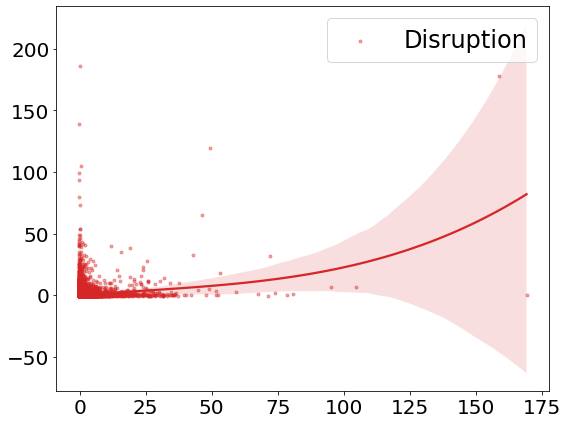

In [97]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

#sns.regplot(x=X_CD5, y=X_ta, order=3, label='CD index', color='C1', marker='.', scatter_kws=dict(alpha=0.4), truncate=True, ax=ax)
sns.regplot(x=X_ni, y=Y_B, order=3, label='Disruption', color='C3', marker='.', scatter_kws=dict(alpha=0.4), truncate=True, ax=ax)
#sns.regplot(x=X_nj, y=Y_B, order=3, label='Consolidation', color='C0', marker='.', scatter_kws=dict(alpha=0.4), truncate=True, ax=ax)

# ax.set_xlabel('CD index', fontsize=24)
# ax.set_y1label('Disruption', fontsize=24)
# ax.set_y2label('B', fontsize=24)
ax.legend(loc='best', fontsize=24)

# Set axis limits
# ax.set_xlim([0, 100])
#ax.set_ylim([0, 1])

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Set title and adjust layout
#fig.suptitle('Relationship between dt, CD5, and B', fontsize=25)
fig.tight_layout()

In [ ]:
# Load the data
data = pd.read_csv('data.csv')

# Create the design matrix and response variable
X = data[['age', 'sex', 'income', 'education', 'employment']]
y = data['count']

# Add a constant to the design matrix for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

In [79]:
scipy.stats.kendalltau(f3['CD5'] , f3['B'])

KendalltauResult(correlation=-0.1371827944337685, pvalue=0.0)

In [80]:
scipy.stats.kendalltau(f3['CD5'] , f3['da'])

KendalltauResult(correlation=0.03761940496866004, pvalue=2.4275525908163935e-244)

In [81]:
f4 = f3[f3['indegree']!=0]

In [82]:
scipy.stats.kendalltau(f4['CD5'] , f4['B'])

KendalltauResult(correlation=0.004343763185500419, pvalue=6.831120634592311e-05)

In [83]:
scipy.stats.kendalltau(f4['CD5'] , f4['da'])

KendalltauResult(correlation=0.1472503517464381, pvalue=0.0)

In [84]:
scipy.stats.kendalltau(f3['ni'] , f3['B'])

KendalltauResult(correlation=0.2775000218693426, pvalue=0.0)

In [98]:
scipy.stats.kendalltau(df2['CD5'] , df2['B'])

KendalltauResult(correlation=-0.15995516920244587, pvalue=0.0)

In [99]:
scipy.stats.kendalltau(df2['CD5'] , df2['da'])

KendalltauResult(correlation=0.01004426980074382, pvalue=9.84768284555315e-17)

In [100]:
scipy.stats.kendalltau(df2['ni'] , df2['B'])

KendalltauResult(correlation=0.2857156834682898, pvalue=0.0)

In [101]:
scipy.stats.kendalltau(df2['nj'] , df2['B'])

KendalltauResult(correlation=0.3112328829314543, pvalue=0.0)

In [102]:
scipy.stats.kendalltau(df2['indegree'] , df2['B'])

KendalltauResult(correlation=0.49924556754491345, pvalue=0.0)

In [103]:
scipy.stats.kendalltau(df2['indegree'] , df2['da'])

KendalltauResult(correlation=0.1286747559552837, pvalue=0.0)

In [106]:
scipy.stats.kendalltau(df2['outdegree'] , df2['B'])

KendalltauResult(correlation=0.05871111576385644, pvalue=0.0)

In [104]:
scipy.stats.kendalltau(df2['outdegree'] , df2['da'])

KendalltauResult(correlation=-0.05458238458584541, pvalue=0.0)

In [ ]:
X_da = []
Y_B = []
X_CD5 = []
percentiles = np.linspace(0, 100, 20)
for year in df['year'].unique():
    # Subset the data for the current year
    year_data = df[df['year'] == year]
    # Calculate percentiles for da and transform to percentiles
    da_min = year_data['da'].min()
    da_max = year_data['da'].max()
    da_range = da_max - da_min
    year_data['da_perc'] = ((year_data['da'] - da_min) / da_range) * 100
    x_da_perc = np.percentile(year_data['da_perc'], percentiles)
    
    # Calculate percentiles for CD5 and transform to percentiles
    cd5_min = year_data['CD5'].min()
    cd5_max = year_data['CD5'].max()
    cd5_range = cd5_max - cd5_min
    year_data['CD5_perc'] = ((year_data['CD5'] - cd5_min) / cd5_range) * 100
    x_CD5_perc = np.percentile(year_data['CD5_perc'], percentiles)
    
    # Calculate percentiles for B and transform to percentiles
    B_min = year_data['B'].min()
    B_max = year_data['B'].max()
    B_range = B_max - B_min
    year_data['B_perc'] = ((year_data['B'] - B_min) / B_range) * 100
    y_B = np.percentile(year_data['B_perc'], percentiles)
    
    # Store the X and Y values for this year
    X_da.append(x_da_perc)
    X_CD5.append(x_CD5_perc)
    Y_B.append(y_B)